In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as  transforms
import matplotlib.pyplot as plt
import numpy as np
import math




device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)



train_set = torchvision.datasets.MNIST(root = '../../data', train= True, transform= transforms.ToTensor(), download= True)
test_set = torchvision.datasets.MNIST(root = '../../data', train= False, transform= transforms.ToTensor(), download= True)

batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)




cuda:0
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.91MB/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.77MB/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [ ]:
print(len(train_set))
print(len(test_set))

60000
10000


In [ ]:
def Show_imgs(imgs, name,  size = 3, color = True):
  color_m ='jet'
  if color == False:
    color_m ='gray'
  print('******************' + name  +  '**************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))

  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap = 'gray')
  plt.show()


******************3**************************


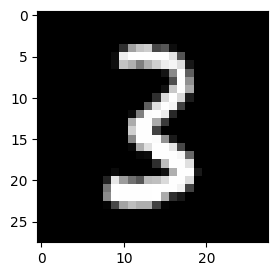

In [ ]:
img, label = train_set[50000]
Show_imgs(img, str(label))

torch.Size([1, 28, 28])
torch.Size([10, 14, 14])
******************numero**************************


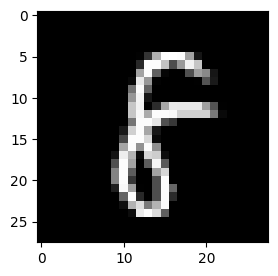

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 4, 28, 28])
********************************************


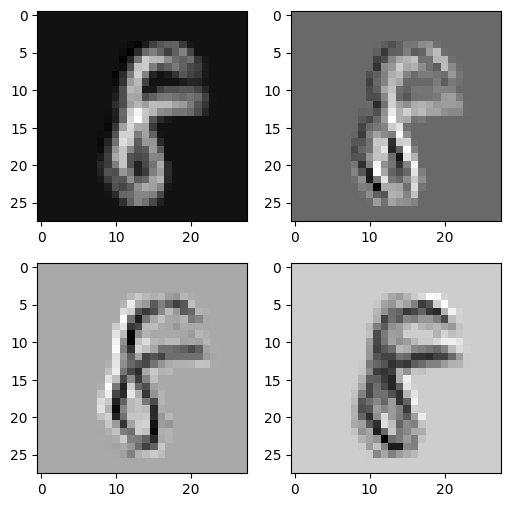

********************************************


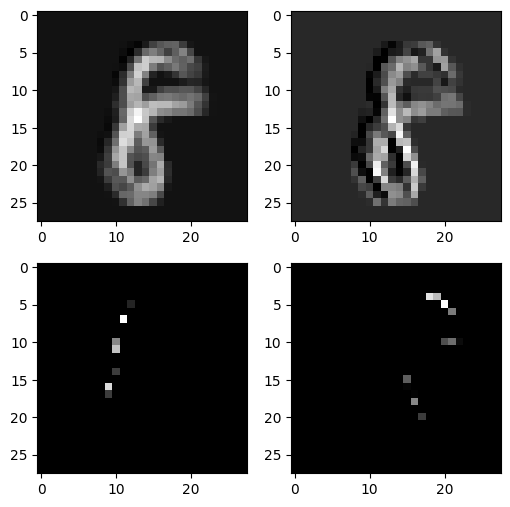

In [ ]:
img, label = train_set[456]
print(img.shape)
conv1 = nn.Conv2d(in_channels=1,out_channels=10,kernel_size=4, stride=2, padding =  1)
out = conv1(img)
print(out.shape)

img, label = train_set[456]

Show_imgs(img, "numero")

#plt.imshow(transforms.ToPILImage()(img), cmap = 'gray')

conv1 = nn.Conv2d(in_channels=1,out_channels=4, kernel_size=3, stride=1, padding=1)
print(img.shape)


img = img.unsqueeze(0)
print(img.shape)

# [batch_size, Channel, H,W]

out =  conv1(img)
print(out.shape)
Show_imgs(out[0],"")
act = nn.ReLU()(out)
Show_imgs(act[0],"")

#pool1 = nn.MaxPool2d(2,2)(act)
#Show_imgs(pool1[0],"")

torch.Size([1, 4, 14, 14])
******************layer 1**************************


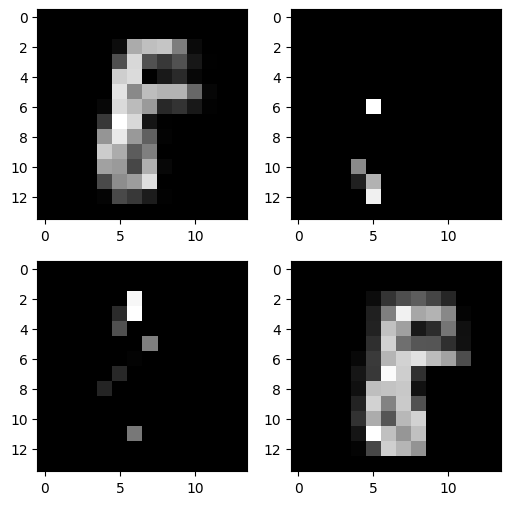

In [ ]:



layer1 = nn.Sequential( nn.Conv2d(1,4,3,1,1) , nn.ReLU(), nn.MaxPool2d(2,2))

out = layer1(img)
print(out.shape)
Show_imgs(out[0], "layer 1")

#print("si")
#print(out.shape)

#out = out.reshape(out.size(0),-1)
#print(out.shape)


#for i in range(4):
#  Show_imgs(layer1[0].weight[i],"layer 1 weight", 1)
#Show_imgs(layer1[0].weight,"layer 1 weight", 1)


In [ ]:
#hypengrparameter
num_classes = 10
learning_rate =  0.001
num_epochs = 20

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # convierte las matrices pequeñas en un vector
        #print(out.shape)
        out = out.reshape(out.size(0), -1)
        #print(out.shape)
        # Este out es el feacture vector
        out = self.fc(out)
        return out




In [ ]:
model         = CNN(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)
#loss_train    = train(model, optimizer, loss_fn, num_epochs)
#test(model)

print([ e.shape  for e in model.fc.parameters()])

model.fc.weight


[torch.Size([10, 1568]), torch.Size([10])]


Parameter containing:
tensor([[ 0.0228, -0.0247, -0.0046,  ...,  0.0036,  0.0190, -0.0196],
        [ 0.0064, -0.0197,  0.0073,  ...,  0.0239, -0.0129,  0.0166],
        [-0.0156, -0.0038, -0.0246,  ...,  0.0200, -0.0229, -0.0079],
        ...,
        [ 0.0108, -0.0056, -0.0036,  ..., -0.0090, -0.0174,  0.0094],
        [-0.0196,  0.0033, -0.0086,  ..., -0.0123,  0.0198,  0.0059],
        [-0.0071,  0.0034, -0.0014,  ..., -0.0033,  0.0049, -0.0113]],
       device='cuda:0', requires_grad=True)

In [ ]:
def train(model, optimizer, loos_fn, num_epochs):
  loss_vals = []
  running_loss =0.0
  # train the model
  total_step = len(train_loader)

  list_loss= []
  list_time = []
  j=0

  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      # forward
      output = model(images)
      loss   = loss_fn(output, labels)
      # change the params
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      list_loss.append(loss.item())
      list_time.append(j)
      j+=1

      if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

  print('Finished Training Trainset')
  return list_loss


In [ ]:
list_loss = train(model,optimizer,loss_fn,20)

Epoch [1/20], Step [100/938], Loss: 0.3404
Epoch [1/20], Step [200/938], Loss: 0.5125
Epoch [1/20], Step [300/938], Loss: 0.1960
Epoch [1/20], Step [400/938], Loss: 0.2754
Epoch [1/20], Step [500/938], Loss: 0.0847
Epoch [1/20], Step [600/938], Loss: 0.0886
Epoch [1/20], Step [700/938], Loss: 0.1407
Epoch [1/20], Step [800/938], Loss: 0.0518
Epoch [1/20], Step [900/938], Loss: 0.1016
Epoch [2/20], Step [100/938], Loss: 0.0315
Epoch [2/20], Step [200/938], Loss: 0.0344
Epoch [2/20], Step [300/938], Loss: 0.0469
Epoch [2/20], Step [400/938], Loss: 0.0295
Epoch [2/20], Step [500/938], Loss: 0.1349
Epoch [2/20], Step [600/938], Loss: 0.0159
Epoch [2/20], Step [700/938], Loss: 0.0080
Epoch [2/20], Step [800/938], Loss: 0.1538
Epoch [2/20], Step [900/938], Loss: 0.0029
Epoch [3/20], Step [100/938], Loss: 0.0174
Epoch [3/20], Step [200/938], Loss: 0.0365
Epoch [3/20], Step [300/938], Loss: 0.0117
Epoch [3/20], Step [400/938], Loss: 0.0247
Epoch [3/20], Step [500/938], Loss: 0.0124
Epoch [3/20

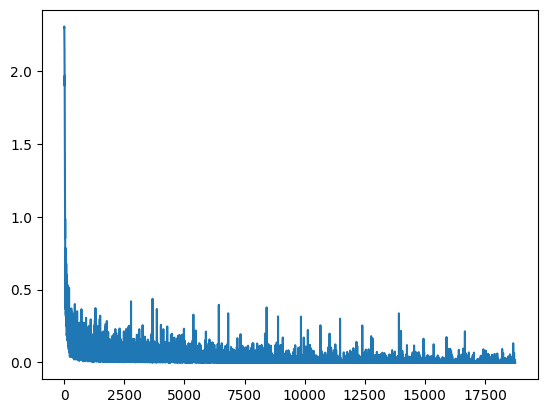

In [ ]:
plt.plot(list_loss)


In [ ]:
with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99.01 %


tensor([[-15.1167,  -0.4040,  17.1051, -11.6956, -13.5835, -24.0867, -17.3958,
           0.2747, -13.6935,  -9.6891]])
tensor([[0, 2]])
layer 1: Convolution output


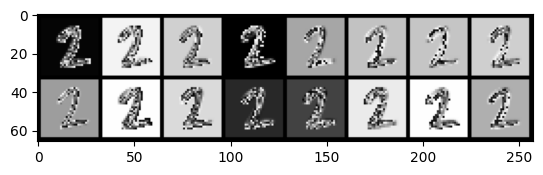

layer 1: Activation function output


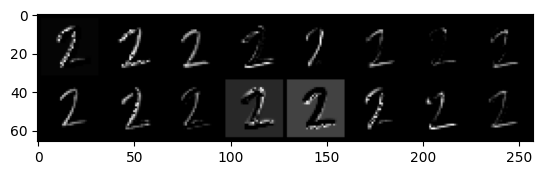

layer 1: Max-Pooling


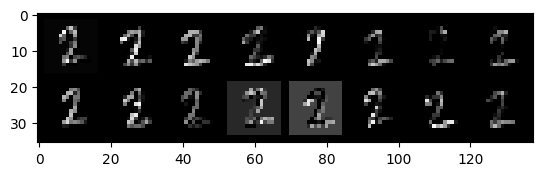

layer 2: Convolution output


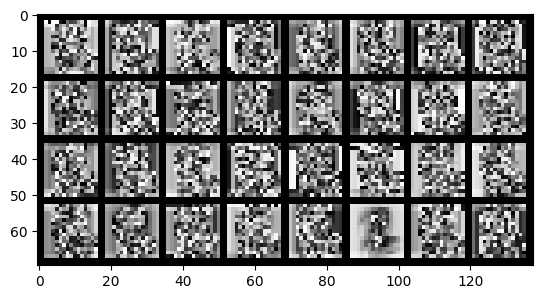

layer 2: Activation function output


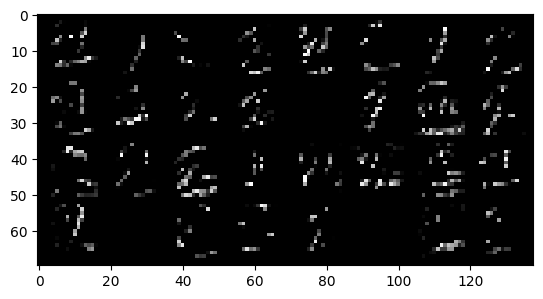

layer 2: Max-Pooling


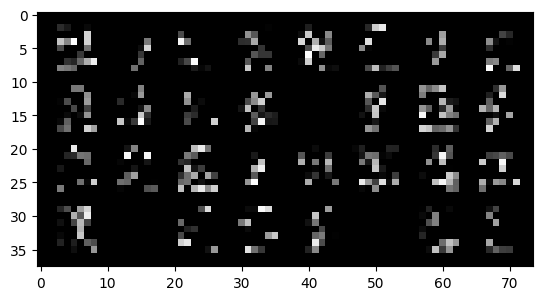

In [ ]:
def Show(out, title = ''):
  print(title)
  out = out.permute(1,0,2,3)
  grilla = torchvision.utils.make_grid(out)
  plt.imshow(transforms.ToPILImage()(grilla), 'jet')
  plt.show()

def Show_Weight(out):
  grilla = torchvision.utils.make_grid(out)
  plt.imshow(transforms.ToPILImage()(grilla), 'jet')
  plt.show()


with torch.no_grad():
  model.to('cpu')
  img, label = test_set[456]
  img = img.unsqueeze(0)
  out = model(img)
  print(out)
  print ((out == out.max()).nonzero())

  out = model.layer1[0](img)
  Show(out, 'layer 1: Convolution output')
  out = model.layer1[1](out)
  Show(out, 'layer 1: Activation function output')
  out = model.layer1[2](out)
  Show(out, 'layer 1: Max-Pooling')


  out = model.layer2[0](out)
  Show(out, 'layer 2: Convolution output')
  out = model.layer2[1](out)
  Show(out, 'layer 2: Activation function output')
  out = model.layer2[2](out)
  Show(out, 'layer 2: Max-Pooling')


X
torch.Size([1, 1, 28, 28])
Y
torch.Size([1, 1, 26, 26])
Entrada
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


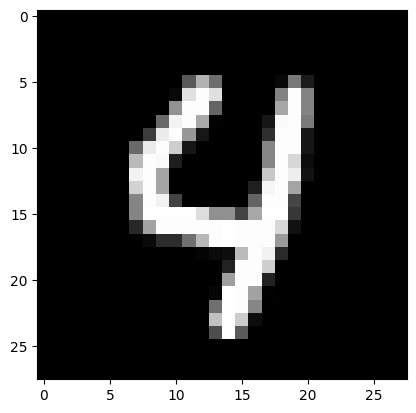

In [ ]:
img, label = train_set[564]
plt.imshow(transforms.ToPILImage()(img), cmap = 'gray')
img = img.unsqueeze(0)

conv = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=5, stride=1, padding=1)
out = conv(img)

print("X")
print(img.shape)
print("Y")
print(out.shape)

conv2 = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=3, stride=1, padding=1)
out = conv2(img)
out = conv3(out)


print("Entrada")
print(img.shape)

print(out.shape)



In [ ]:
print([ e.shape  for e in model.fc.parameters()])

model.fc.weight


[torch.Size([10, 1568]), torch.Size([10])]


Parameter containing:
tensor([[ 0.0458, -0.0154, -0.0137,  ..., -0.2435, -0.4713, -0.2421],
        [ 0.1297,  0.0879, -0.1251,  ..., -0.0401, -0.0647,  0.1004],
        [ 0.0574,  0.1394,  0.0155,  ...,  0.2829,  0.3015, -0.0388],
        ...,
        [-0.0775, -0.2631, -0.2030,  ...,  0.1508,  0.0030, -0.0865],
        [ 0.1270,  0.0986,  0.0350,  ..., -0.1009, -0.0816,  0.1275],
        [-0.1269, -0.1646, -0.0157,  ...,  0.0416,  0.0592,  0.1743]],
       requires_grad=True)